##  Vizualization of FrED Run Conditions.

Various methods to vizualize FrED Run Conditions (time-invariant) in preparation for regression analysis.

Uses auto porcessed run condition data - "Run Condition Data Summary.csv"

J. Cuiffi, - Penn State New Kensington

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# load run condition data into dataframe
# current file - 050820 11:06pm
path_local = 'C:/Users/cuiff/Dropbox/Python Common Library/python-fred/data/Reports/'
data = pd.read_csv(path_local + 'Run Condition Data Summary.csv')
data

,Run File,Feed Rate Ave (RPS),Spool Wind Rate Set (RPS),Spool Rate Ave (RPS),Wind BF Rate Ave (PPS),Heater Set (C),Heater Temp Ave (C),Filament Diamter Ave (mm),Filament Std Dev (mm),System Power Ave (W),System Power Std Dev (W),Heater Current Ave (mA),Heater Current Std Dev (mA),Spool DC Motor Current Ave (mA),Spool DC Motor Current Std Dev (mA),Stepper and 12V Current Ave (mA),Stepper and 12V Current Std Dev (mA)
0,log_Manual Control__2020-04-12_12-13-50.csv,0.001000,1.00,1.000132,127.730719,90.0,90.009313,0.213487,0.016746,29.041052,1.000198,1778.186258,79.322377,134.912897,4.725082,506.607985,21.983723
1,log_Manual Control__2020-04-12_17-26-48.csv,0.000312,0.25,0.250982,20.426288,90.0,90.068162,0.228383,0.044286,30.064674,1.123981,1956.170717,89.196351,48.890935,2.843820,503.176947,23.016114
2,log_Manual Control__2020-04-12_17-26-48.csv,0.000312,0.50,0.499899,28.561457,90.0,90.080434,0.172805,0.012332,29.126951,1.001411,1849.457701,83.001875,76.481605,2.496682,503.087202,21.010638
3,log_Manual Control__2020-04-12_17-49-04.csv,0.000500,0.25,0.254232,45.159629,90.0,89.850642,0.302968,0.022932,28.685025,1.093912,1836.095309,89.052970,48.176519,4.276480,506.039012,19.272695
4,log_Manual Control__2020-04-12_17-49-04.csv,0.000500,0.50,0.499777,63.865360,90.0,90.043857,0.217002,0.014405,28.366543,0.931641,1785.295597,76.500593,75.523040,2.469729,507.120755,19.777991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,log_Manual Control__2020-05-26_10-47-57.csv,0.004000,0.75,0.749697,221.236095,80.0,79.951250,0.450721,0.029310,25.648463,2.279616,1483.039423,530.116817,83.442500,76.902199,529.627885,72.508352
57,log_Manual Control__2020-05-26_10-47-57.csv,0.004000,0.50,0.499585,180.638516,80.0,79.994511,0.549398,0.042787,24.219703,9.242227,1496.053383,252.112897,47.506090,126.437749,493.186466,590.291411
58,log_Manual Control__2020-05-26_10-47-57.csv,0.005000,1.00,0.998329,285.614571,80.0,80.010143,0.412343,0.052719,24.840470,9.815740,1494.695714,143.295658,122.041786,44.229984,447.714286,810.909139
59,log_Manual Control__2020-05-26_10-47-57.csv,0.005000,0.75,0.749777,247.349474,80.0,79.871364,0.484278,0.036691,25.306375,1.619509,1464.442045,549.825712,83.640000,67.426717,524.756818,63.443992


### Fiber Diameter - Key Parameters
Start by exploring the key paramters that determine fiber diameter: Feed Speed, Spool Speed, Heater Temperature.

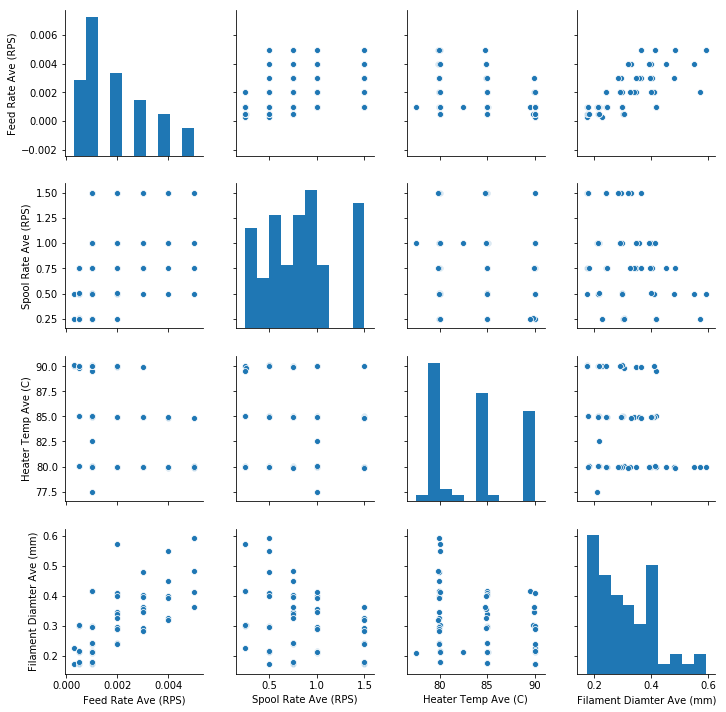

,Feed Rate Ave (RPS),Spool Rate Ave (RPS),Heater Temp Ave (C),Filament Diamter Ave (mm)
Feed Rate Ave (RPS),1.000000,0.325072,-0.338853,0.689340
Spool Rate Ave (RPS),0.325072,1.000000,-0.114830,-0.352166
Heater Temp Ave (C),-0.338853,-0.114830,1.000000,-0.282535
Filament Diamter Ave (mm),0.689340,-0.352166,-0.282535,1.000000


In [3]:
# start by taking a look at a pair plot and correlation matrix
# create reduced feature dataframe
df = data[['Feed Rate Ave (RPS)','Spool Rate Ave (RPS)','Heater Temp Ave (C)','Filament Diamter Ave (mm)']]
#sn.heatmap(df.corr(), annot=True)
#plt.show()
sn.pairplot(df)
plt.show()
df.corr()

In [4]:
# add a dataframe column that includes sqrt(feed speed / spool speed) as shown in our basic model
data['Sqrt Feed/Spool'] = np.sqrt(data['Feed Rate Ave (RPS)'] / data['Spool Rate Ave (RPS)'])
data.head()

,Run File,Feed Rate Ave (RPS),Spool Wind Rate Set (RPS),Spool Rate Ave (RPS),Wind BF Rate Ave (PPS),Heater Set (C),Heater Temp Ave (C),Filament Diamter Ave (mm),Filament Std Dev (mm),System Power Ave (W),System Power Std Dev (W),Heater Current Ave (mA),Heater Current Std Dev (mA),Spool DC Motor Current Ave (mA),Spool DC Motor Current Std Dev (mA),Stepper and 12V Current Ave (mA),Stepper and 12V Current Std Dev (mA),Sqrt Feed/Spool
0,log_Manual Control__2020-04-12_12-13-50.csv,0.001000,1.00,1.000132,127.730719,90.0,90.009313,0.213487,0.016746,29.041052,1.000198,1778.186258,79.322377,134.912897,4.725082,506.607985,21.983723,0.031621
1,log_Manual Control__2020-04-12_17-26-48.csv,0.000312,0.25,0.250982,20.426288,90.0,90.068162,0.228383,0.044286,30.064674,1.123981,1956.170717,89.196351,48.890935,2.843820,503.176947,23.016114,0.035286
2,log_Manual Control__2020-04-12_17-26-48.csv,0.000312,0.50,0.499899,28.561457,90.0,90.080434,0.172805,0.012332,29.126951,1.001411,1849.457701,83.001875,76.481605,2.496682,503.087202,21.010638,0.025003
3,log_Manual Control__2020-04-12_17-49-04.csv,0.000500,0.25,0.254232,45.159629,90.0,89.850642,0.302968,0.022932,28.685025,1.093912,1836.095309,89.052970,48.176519,4.276480,506.039012,19.272695,0.044348
4,log_Manual Control__2020-04-12_17-49-04.csv,0.000500,0.50,0.499777,63.865360,90.0,90.043857,0.217002,0.014405,28.366543,0.931641,1785.295597,76.500593,75.523040,2.469729,507.120755,19.777991,0.031630


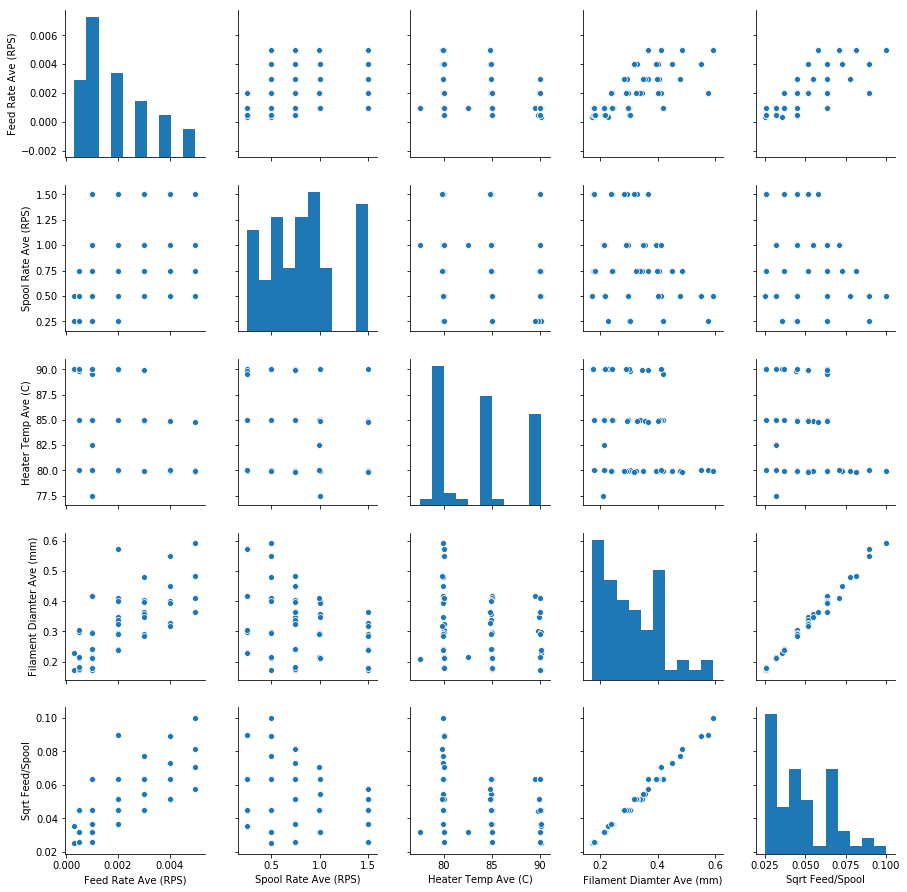

,Feed Rate Ave (RPS),Spool Rate Ave (RPS),Heater Temp Ave (C),Filament Diamter Ave (mm),Sqrt Feed/Spool
Feed Rate Ave (RPS),1.000000,0.325072,-0.338853,0.689340,0.733815
Spool Rate Ave (RPS),0.325072,1.000000,-0.114830,-0.352166,-0.314407
Heater Temp Ave (C),-0.338853,-0.114830,1.000000,-0.282535,-0.298767
Filament Diamter Ave (mm),0.689340,-0.352166,-0.282535,1.000000,0.995249
Sqrt Feed/Spool,0.733815,-0.314407,-0.298767,0.995249,1.000000


In [5]:
# ook at a pair plot and correlation matrix again
# create reduced feature dataframe
df = data[['Feed Rate Ave (RPS)','Spool Rate Ave (RPS)','Heater Temp Ave (C)','Filament Diamter Ave (mm)','Sqrt Feed/Spool']]
#sn.heatmap(df.corr(), annot=True)
#plt.show()
sn.pairplot(df)
plt.show()
df.corr()

Fiber Diameter versus Sqrt(Feed/Spool)


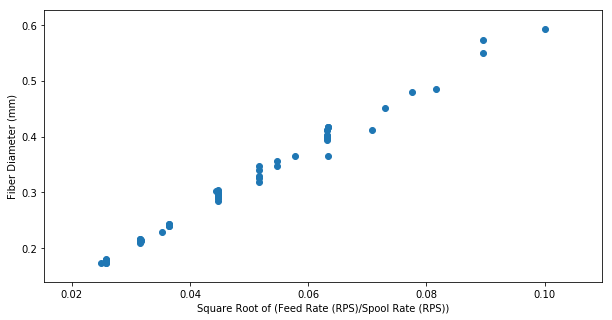

In [6]:
# plot filament diameter versus sqrt(feed/spool)
fig, ax1 = plt.subplots()
fig.set_size_inches(10,5)
ax1.scatter(data['Sqrt Feed/Spool'],data['Filament Diamter Ave (mm)'])
ax1.set_xlabel('Square Root of (Feed Rate (RPS)/Spool Rate (RPS))')
ax1.set_ylabel('Fiber Diameter (mm)')
print('Fiber Diameter versus Sqrt(Feed/Spool)')

Line Fit: y = 5.802830190291019x + 0.03145952131840188
Fiber Diameter versus Sqrt(Feed/Spool)


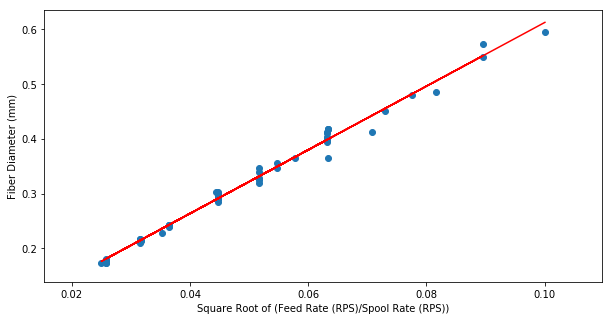

In [7]:
# plot filament diameter versus sqrt(feed/spool) with added line fit - teaser for machine learning
# line fit using numpy polyfit
m, b = np.polyfit(data['Sqrt Feed/Spool'],data['Filament Diamter Ave (mm)'],1)
print('Line Fit: y = {0}x + {1}'.format(m,b))
dia_pred = (m * data['Sqrt Feed/Spool']) + b

fig, ax1 = plt.subplots()
fig.set_size_inches(10,5)
ax1.scatter(data['Sqrt Feed/Spool'],data['Filament Diamter Ave (mm)'])
ax1.plot(data['Sqrt Feed/Spool'],dia_pred,c='r')
ax1.set_xlabel('Square Root of (Feed Rate (RPS)/Spool Rate (RPS))')
ax1.set_ylabel('Fiber Diameter (mm)')
print('Fiber Diameter versus Sqrt(Feed/Spool)')

Fiber Diameter versus Sqrt(Feed/Spool)


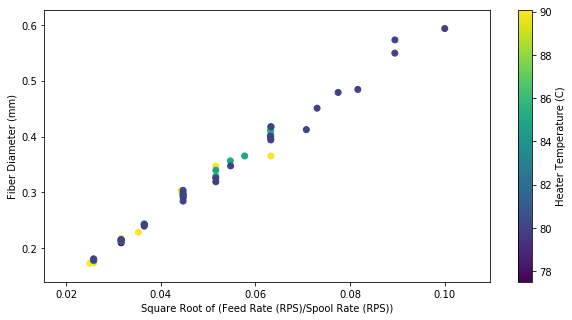

In [8]:
# plot filament diameter versus sqrt(feed/spool) and temperature
fig, ax1 = plt.subplots()
fig.set_size_inches(10,5)
pl = ax1.scatter(data['Sqrt Feed/Spool'],data['Filament Diamter Ave (mm)'],c=data['Heater Temp Ave (C)'])
plt.colorbar(pl, label='Heater Temperature (C)')
ax1.set_xlabel('Square Root of (Feed Rate (RPS)/Spool Rate (RPS))')
ax1.set_ylabel('Fiber Diameter (mm)')
print('Fiber Diameter versus Sqrt(Feed/Spool)')

Fiber Diameter versus Sqrt(Feed/Spool)


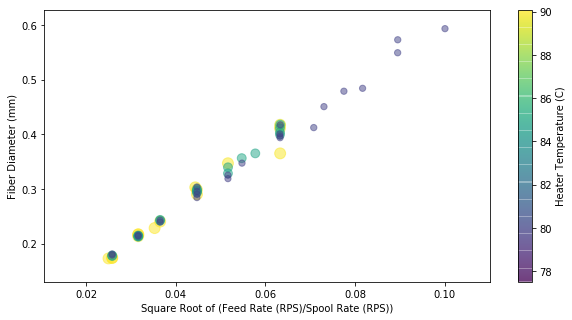

In [9]:
# plot filament diameter versus sqrt(feed/spool) and temperature (both size and color)
fig, ax1 = plt.subplots()
fig.set_size_inches(10,5)
pl = ax1.scatter(data['Sqrt Feed/Spool'],data['Filament Diamter Ave (mm)'],c=data['Heater Temp Ave (C)'],s=((data['Heater Temp Ave (C)']-75)*8 ),alpha=.5)
plt.colorbar(pl, label='Heater Temperature (C)')
ax1.set_xlabel('Square Root of (Feed Rate (RPS)/Spool Rate (RPS))')
ax1.set_ylabel('Fiber Diameter (mm)')
print('Fiber Diameter versus Sqrt(Feed/Spool)')

<IPython.core.display.Javascript object>


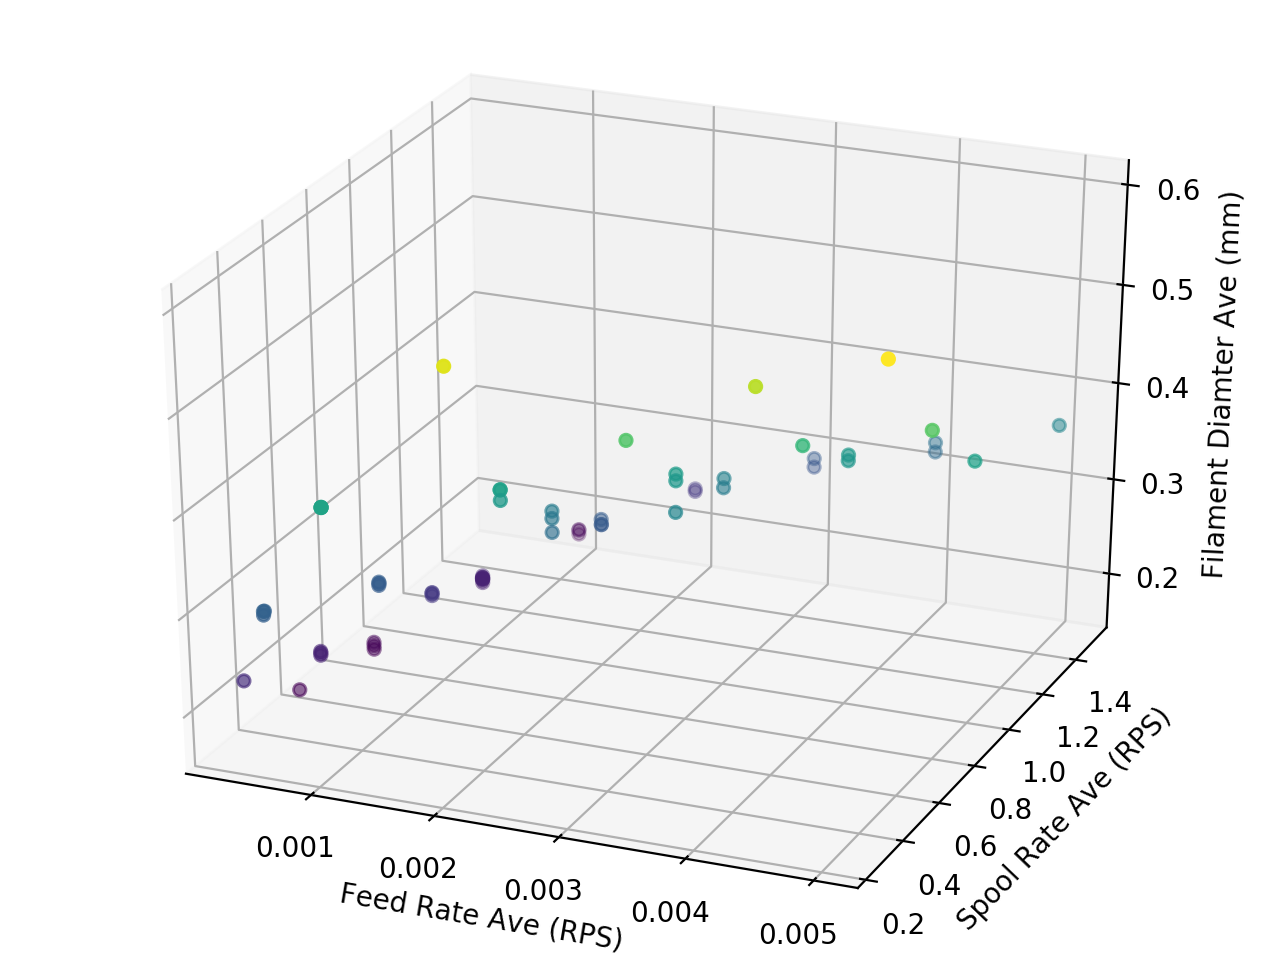

Fiber Diameter versus Feed and Spool Speed


In [10]:
# 3D plot - feed, spool, diameter
%matplotlib notebook
fig = plt.figure()
ax1 = Axes3D(fig)
ax1.scatter(data['Feed Rate Ave (RPS)'],data['Spool Rate Ave (RPS)'],data['Filament Diamter Ave (mm)'],c=data['Filament Diamter Ave (mm)'])
ax1.set_xlabel('Feed Rate Ave (RPS)')
ax1.set_ylabel('Spool Rate Ave (RPS)')
ax1.set_zlabel('Filament Diamter Ave (mm)')
print('Fiber Diameter versus Feed and Spool Speed')

<IPython.core.display.Javascript object>


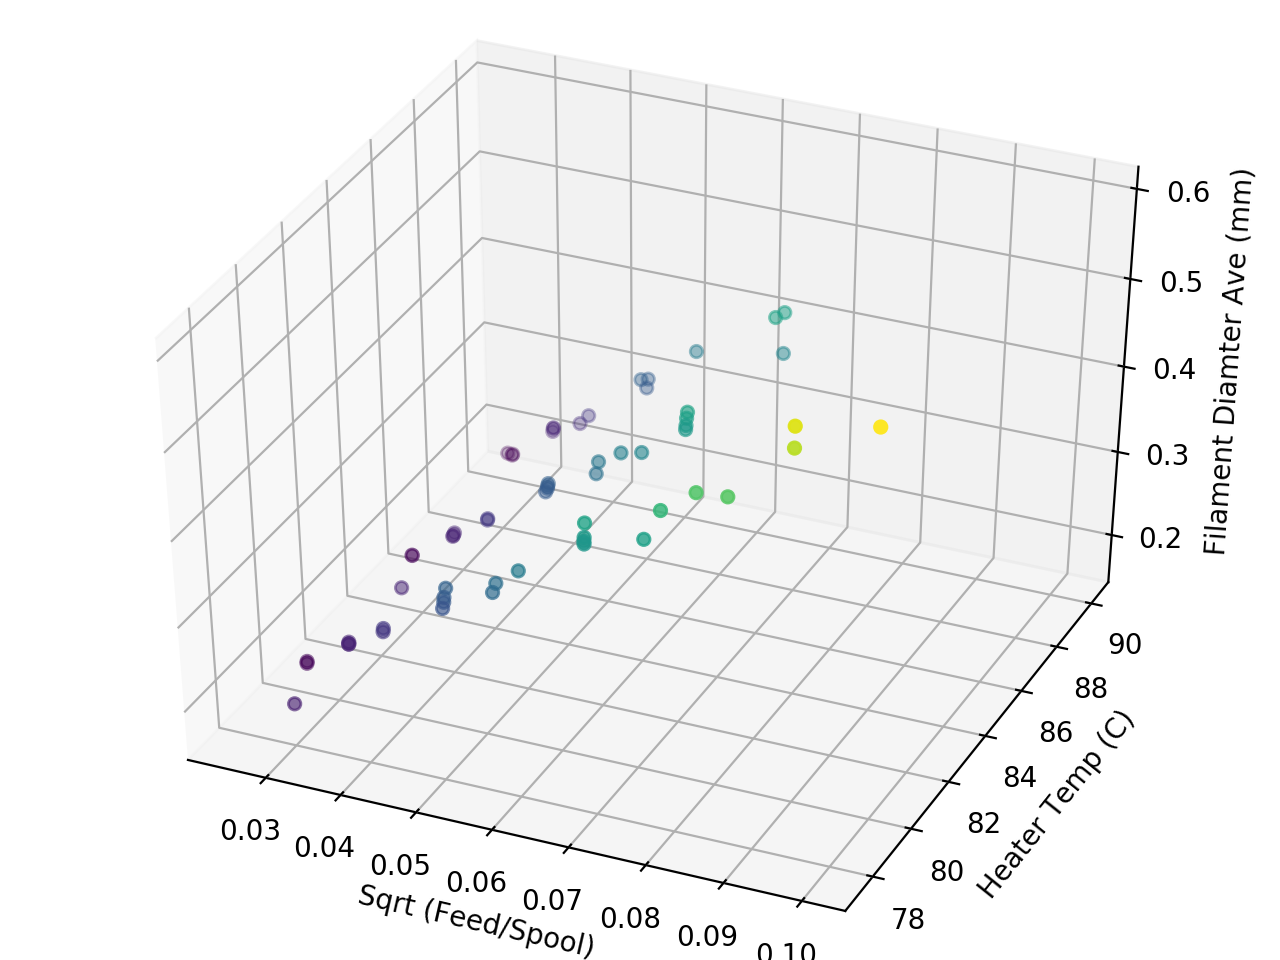

Fiber Diameter versus Feed and Spool Speed


In [12]:
# 3D plot - sqrt(feed/spool), temp, diameter
fig = plt.figure()
ax1 = Axes3D(fig)
ax1.scatter(data['Sqrt Feed/Spool'],data['Heater Temp Ave (C)'],data['Filament Diamter Ave (mm)'],c=data['Filament Diamter Ave (mm)'])
ax1.set_xlabel('Sqrt (Feed/Spool)')
ax1.set_ylabel('Heater Temp (C)')
ax1.set_zlabel('Filament Diamter Ave (mm)')
print('Fiber Diameter versus Feed and Spool Speed')

### Fiber Diameter - Standard Deviation
Explore the factors that influence the standard deviation of fiber diameter, a measure of quality.

In [25]:
# add a dataframe column that includes % std dev of fiber diameter
data['Filament Std Dev (%)'] = 100 * data['Filament Std Dev (mm)'] / data['Filament Diamter Ave (mm)']
data

,Run File,Feed Rate Ave (RPS),Spool Wind Rate Set (RPS),Spool Rate Ave (RPS),Wind BF Rate Ave (PPS),Heater Set (C),Heater Temp Ave (C),Filament Diamter Ave (mm),Filament Std Dev (mm),System Power Ave (W),System Power Std Dev (W),Heater Current Ave (mA),Heater Current Std Dev (mA),Spool DC Motor Current Ave (mA),Spool DC Motor Current Std Dev (mA),Stepper and 12V Current Ave (mA),Stepper and 12V Current Std Dev (mA),Sqrt Feed/Spool,Filament Std Dev (%)
0,log_Manual Control__2020-04-12_12-13-50.csv,0.001000,1.00,1.000132,127.730719,90.0,90.009313,0.213487,0.016746,29.041052,1.000198,1778.186258,79.322377,134.912897,4.725082,506.607985,21.983723,0.031621,7.844254
1,log_Manual Control__2020-04-12_17-26-48.csv,0.000312,0.25,0.250982,20.426288,90.0,90.068162,0.228383,0.044286,30.064674,1.123981,1956.170717,89.196351,48.890935,2.843820,503.176947,23.016114,0.035286,19.391069
2,log_Manual Control__2020-04-12_17-26-48.csv,0.000312,0.50,0.499899,28.561457,90.0,90.080434,0.172805,0.012332,29.126951,1.001411,1849.457701,83.001875,76.481605,2.496682,503.087202,21.010638,0.025003,7.136502
3,log_Manual Control__2020-04-12_17-49-04.csv,0.000500,0.25,0.254232,45.159629,90.0,89.850642,0.302968,0.022932,28.685025,1.093912,1836.095309,89.052970,48.176519,4.276480,506.039012,19.272695,0.044348,7.569233
4,log_Manual Control__2020-04-12_17-49-04.csv,0.000500,0.50,0.499777,63.865360,90.0,90.043857,0.217002,0.014405,28.366543,0.931641,1785.295597,76.500593,75.523040,2.469729,507.120755,19.777991,0.031630,6.638087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,log_Manual Control__2020-05-26_10-47-57.csv,0.004000,0.75,0.749697,221.236095,80.0,79.951250,0.450721,0.029310,25.648463,2.279616,1483.039423,530.116817,83.442500,76.902199,529.627885,72.508352,0.073044,6.503005
57,log_Manual Control__2020-05-26_10-47-57.csv,0.004000,0.50,0.499585,180.638516,80.0,79.994511,0.549398,0.042787,24.219703,9.242227,1496.053383,252.112897,47.506090,126.437749,493.186466,590.291411,0.089480,7.787916
58,log_Manual Control__2020-05-26_10-47-57.csv,0.005000,1.00,0.998329,285.614571,80.0,80.010143,0.412343,0.052719,24.840470,9.815740,1494.695714,143.295658,122.041786,44.229984,447.714286,810.909139,0.070770,12.785331
59,log_Manual Control__2020-05-26_10-47-57.csv,0.005000,0.75,0.749777,247.349474,80.0,79.871364,0.484278,0.036691,25.306375,1.619509,1464.442045,549.825712,83.640000,67.426717,524.756818,63.443992,0.081662,7.576478


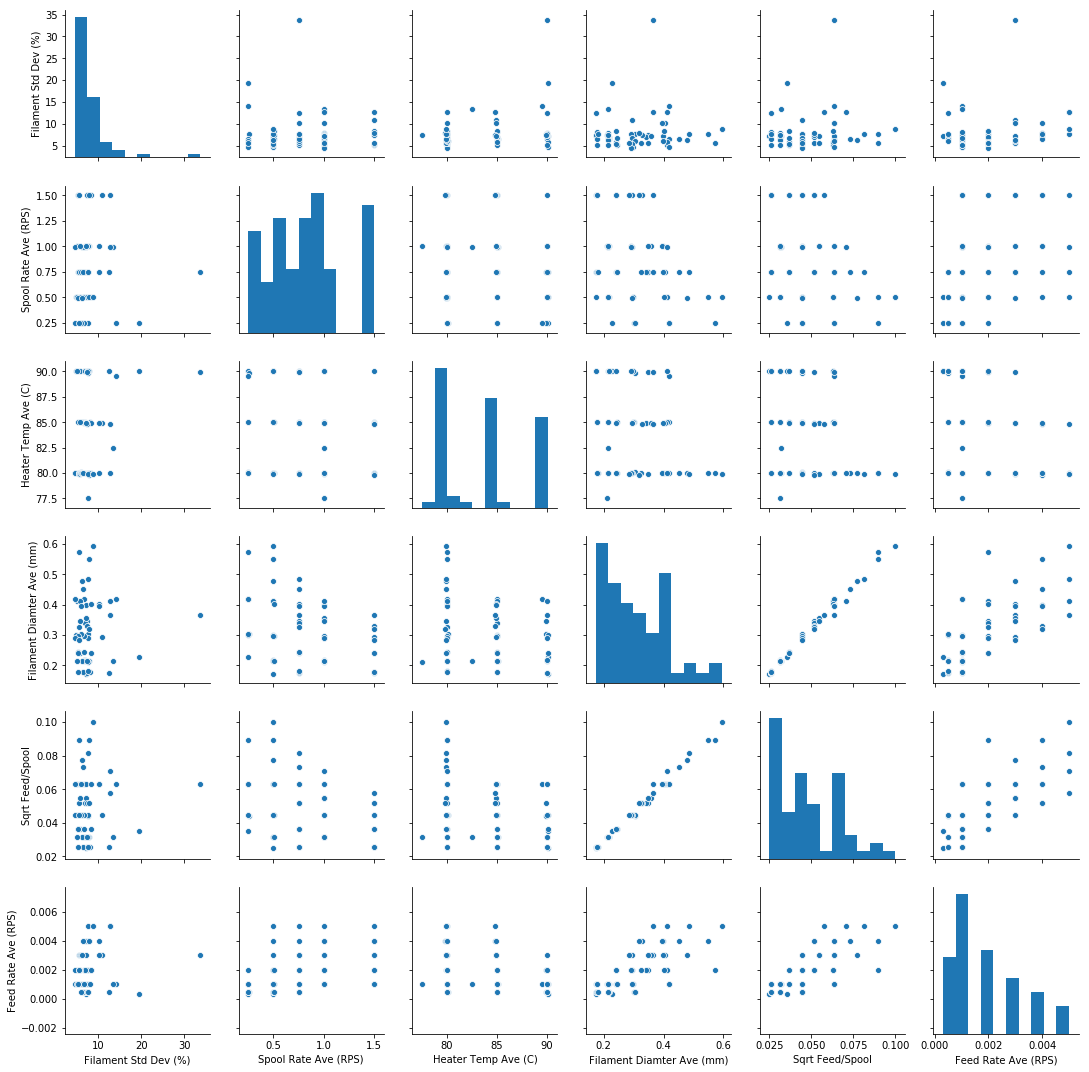

,Filament Std Dev (%),Spool Rate Ave (RPS),Heater Temp Ave (C),Filament Diamter Ave (mm),Sqrt Feed/Spool,Feed Rate Ave (RPS)
Filament Std Dev (%),1.000000,-0.008717,0.291560,0.049799,0.096607,0.160502
Spool Rate Ave (RPS),-0.008717,1.000000,-0.114830,-0.352166,-0.314407,0.325072
Heater Temp Ave (C),0.291560,-0.114830,1.000000,-0.282535,-0.298767,-0.338853
Filament Diamter Ave (mm),0.049799,-0.352166,-0.282535,1.000000,0.995249,0.689340
Sqrt Feed/Spool,0.096607,-0.314407,-0.298767,0.995249,1.000000,0.733815
Feed Rate Ave (RPS),0.160502,0.325072,-0.338853,0.689340,0.733815,1.000000


In [26]:
# explore with correlation matrix
# create reduced feature dataframe
df = data[['Filament Std Dev (%)','Spool Rate Ave (RPS)','Heater Temp Ave (C)','Filament Diamter Ave (mm)','Sqrt Feed/Spool','Feed Rate Ave (RPS)']]
#sn.heatmap(df.corr(), annot=True)
#plt.show()
%matplotlib inline
sn.pairplot(df)
plt.show()
df.corr()

Standard Deviation veruses Fiber Diameter


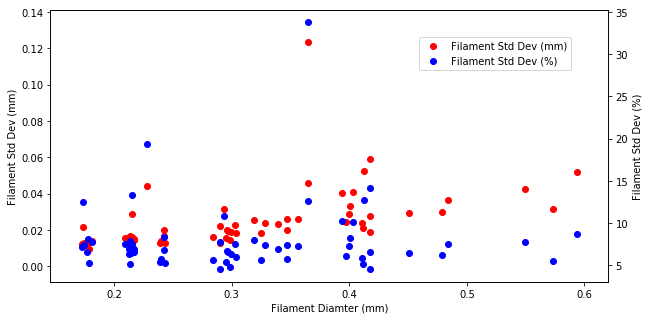

In [27]:
# plot std dev versus filament diameter
%matplotlib inline
fig, ax1 = plt.subplots()
fig.set_size_inches(10,5)
ax2 = ax1.twinx()
ax1.scatter(data['Filament Diamter Ave (mm)'],data['Filament Std Dev (mm)'], c='red')
ax1.set_xlabel('Filament Diamter (mm)')
ax1.set_ylabel('Filament Std Dev (mm)')
ax2.scatter(data['Filament Diamter Ave (mm)'],data['Filament Std Dev (%)'], c='blue')
ax2.set_ylabel('Filament Std Dev (%)')
fig.legend(bbox_to_anchor=(.8,.8))
print('Standard Deviation veruses Fiber Diameter')

Standard Deviation veruses Fiber Diameter and Feed Speed


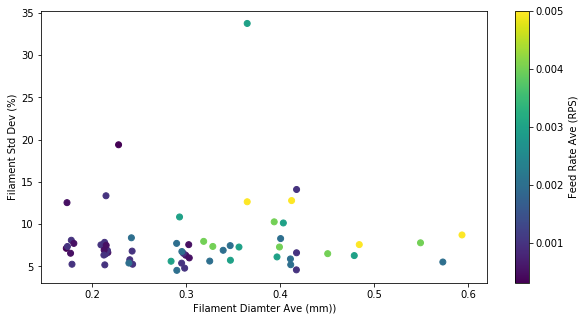

In [28]:
# use std dev % and add color for feed speed
fig, ax1 = plt.subplots()
fig.set_size_inches(10,5)
pl = ax1.scatter(data['Filament Diamter Ave (mm)'],data['Filament Std Dev (%)'],c=data['Feed Rate Ave (RPS)'])
plt.colorbar(pl, label='Feed Rate Ave (RPS)')
ax1.set_xlabel('Filament Diamter Ave (mm))')
ax1.set_ylabel('Filament Std Dev (%)')
print('Standard Deviation veruses Fiber Diameter and Feed Speed')

Standard Deviation veruses Fiber Diameter and Heater Temp


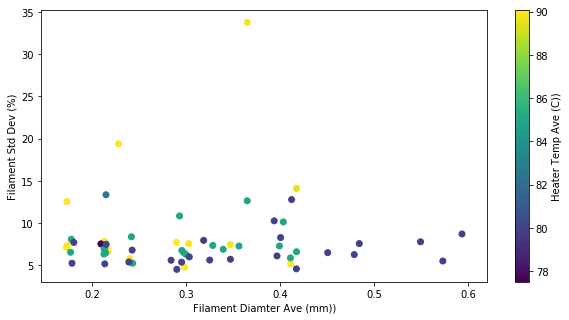

In [29]:
# use std dev % and add color for temperature
fig, ax1 = plt.subplots()
fig.set_size_inches(10,5)
pl = ax1.scatter(data['Filament Diamter Ave (mm)'],data['Filament Std Dev (%)'],c=data['Heater Temp Ave (C)'])
plt.colorbar(pl, label='Heater Temp Ave (C))')
ax1.set_xlabel('Filament Diamter Ave (mm))')
ax1.set_ylabel('Filament Std Dev (%)')
print('Standard Deviation veruses Fiber Diameter and Heater Temp')

<IPython.core.display.Javascript object>


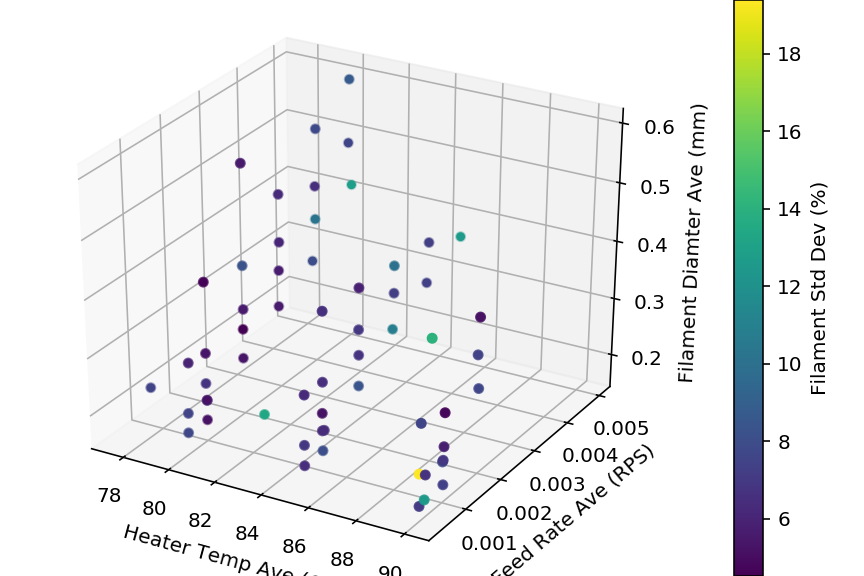

Fiber Diameter versus Feed Speed and Heater Temp (colored with % Std Dev)


In [34]:
# 3D plot - feed, spool, diameter
%matplotlib notebook
# get rid of errant datapoint
df = data[data['Filament Std Dev (%)'] < 20.0]
fig = plt.figure()
ax1 = Axes3D(fig)
pl = ax1.scatter(df['Heater Temp Ave (C)'],df['Feed Rate Ave (RPS)'],df['Filament Diamter Ave (mm)'],c=df['Filament Std Dev (%)'])
ax1.set_xlabel('Heater Temp Ave (C)')
ax1.set_ylabel('Feed Rate Ave (RPS)')
ax1.set_zlabel('Filament Diamter Ave (mm)')
plt.colorbar(pl, label='Filament Std Dev (%)')
print('Fiber Diameter versus Feed Speed and Heater Temp (colored with % Std Dev)')

<IPython.core.display.Javascript object>


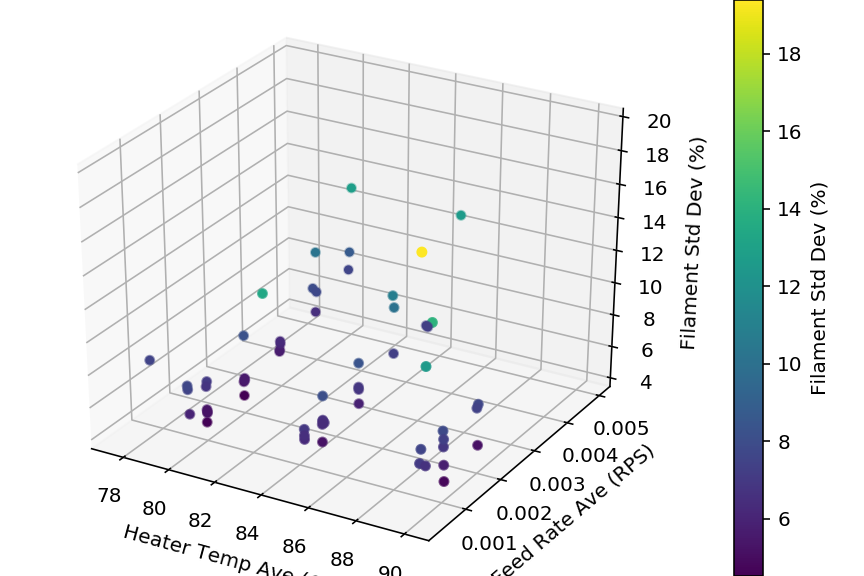

Fiber Diameter versus Feed Speed and Heater Temp (colored with % Std Dev)


In [35]:
# 3D plot - feed, spool, diameter
fig = plt.figure()
ax1 = Axes3D(fig)
pl = ax1.scatter(df['Heater Temp Ave (C)'],df['Feed Rate Ave (RPS)'],df['Filament Std Dev (%)'],c=df['Filament Std Dev (%)'])
ax1.set_xlabel('Heater Temp Ave (C)')
ax1.set_ylabel('Feed Rate Ave (RPS)')
ax1.set_zlabel('Filament Std Dev (%)')
plt.colorbar(pl, label='Filament Std Dev (%)')
print('Fiber Diameter versus Feed Speed and Heater Temp (colored with % Std Dev)')

<IPython.core.display.Javascript object>


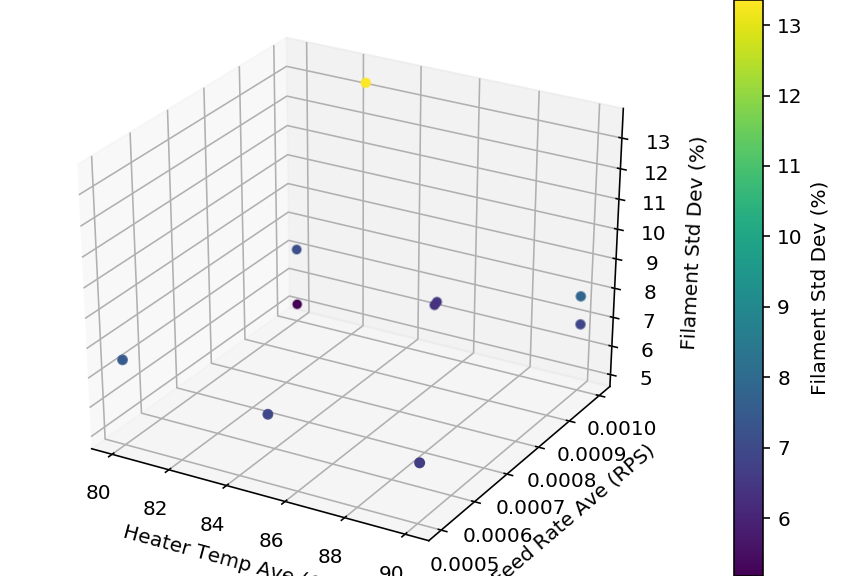

Filament Std Dev (%) versus Feed Speed and Heater Temp (.215mm nominal)


In [36]:
# look a two separate fiber diameters - nom. .214mm
df = data[data['Filament Diamter Ave (mm)'] < .22]
df = df[df['Filament Diamter Ave (mm)'] > .21]
#df
# 3D plot - feed, spool, diameter
fig = plt.figure()
ax1 = Axes3D(fig)
pl = ax1.scatter(df['Heater Temp Ave (C)'],df['Feed Rate Ave (RPS)'],df['Filament Std Dev (%)'],c=df['Filament Std Dev (%)'])
ax1.set_xlabel('Heater Temp Ave (C)')
ax1.set_ylabel('Feed Rate Ave (RPS)')
ax1.set_zlabel('Filament Std Dev (%)')
plt.colorbar(pl, label='Filament Std Dev (%)')
print('Filament Std Dev (%) versus Feed Speed and Heater Temp (.215mm nominal)')

<IPython.core.display.Javascript object>


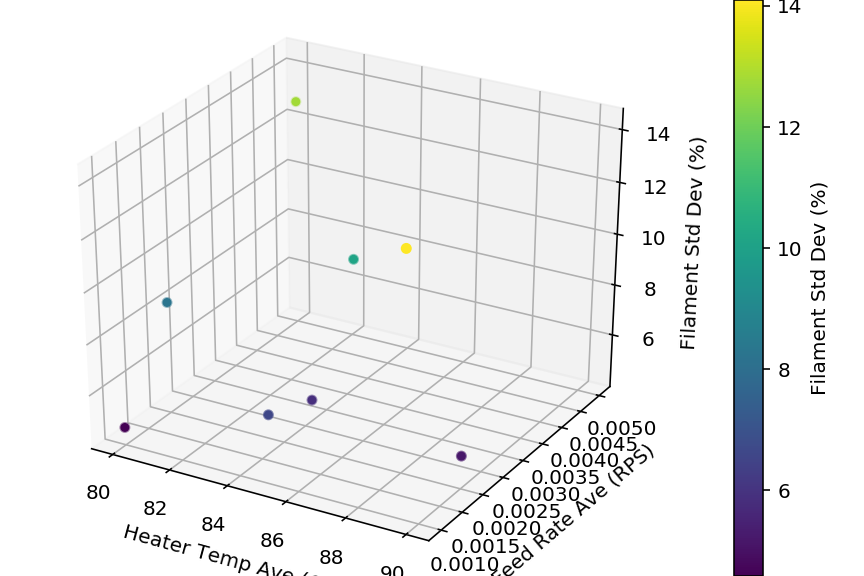

Filament Std Dev (%) versus Feed Speed and Heater Temp (.215mm nominal)


In [37]:
# look a two separate fiber diameters - nom. .41mm
df = data[data['Filament Diamter Ave (mm)'] < .42]
df = df[df['Filament Diamter Ave (mm)'] > .4]
#df
# 3D plot - feed, spool, diameter
fig = plt.figure()
ax1 = Axes3D(fig)
pl = ax1.scatter(df['Heater Temp Ave (C)'],df['Feed Rate Ave (RPS)'],df['Filament Std Dev (%)'],c=df['Filament Std Dev (%)'])
ax1.set_xlabel('Heater Temp Ave (C)')
ax1.set_ylabel('Feed Rate Ave (RPS)')
ax1.set_zlabel('Filament Std Dev (%)')
plt.colorbar(pl, label='Filament Std Dev (%)')
print('Filament Std Dev (%) versus Feed Speed and Heater Temp (.215mm nominal)')

### Power Consumption
Explore power consumption to optimize cost

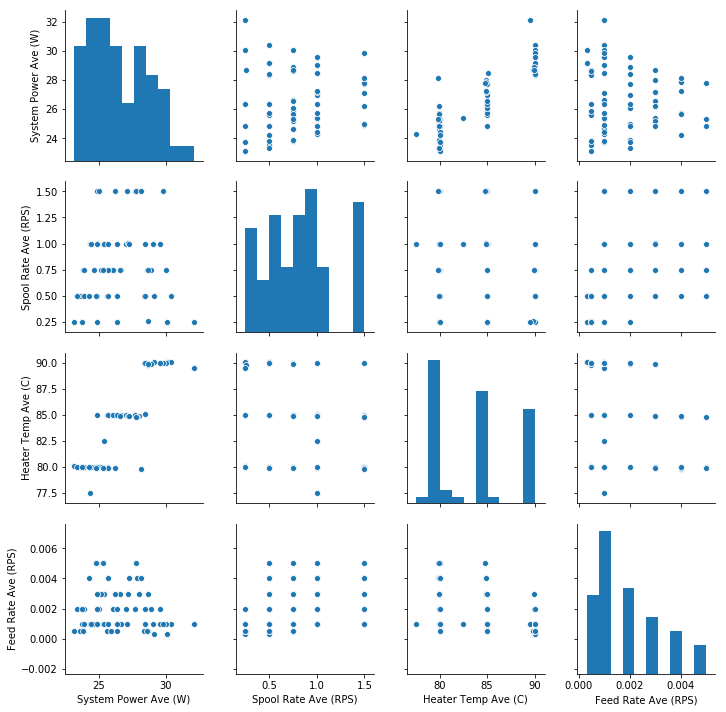

,System Power Ave (W),Spool Rate Ave (RPS),Heater Temp Ave (C),Feed Rate Ave (RPS)
System Power Ave (W),1.000000,0.137786,0.879243,-0.115448
Spool Rate Ave (RPS),0.137786,1.000000,-0.114830,0.325072
Heater Temp Ave (C),0.879243,-0.114830,1.000000,-0.338853
Feed Rate Ave (RPS),-0.115448,0.325072,-0.338853,1.000000


In [13]:
# explore with correlation matrix
# create reduced feature dataframe
df = data[['System Power Ave (W)','Spool Rate Ave (RPS)','Heater Temp Ave (C)','Feed Rate Ave (RPS)']]
#sn.heatmap(df.corr(), annot=True)
#plt.show()
%matplotlib inline
sn.pairplot(df)
plt.show()
df.corr()

Ranges of Current Contribution


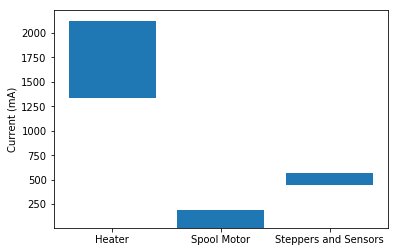

In [14]:
# look at contributions of 3 current legs
plt.bar(['Heater','Spool Motor','Steppers and Sensors'],
        [data['Heater Current Ave (mA)'].max()-data['Heater Current Ave (mA)'].min(),
         data['Spool DC Motor Current Ave (mA)'].max()-data['Spool DC Motor Current Ave (mA)'].min(),
         data['Stepper and 12V Current Ave (mA)'].max()-data['Stepper and 12V Current Ave (mA)'].min()],
        bottom=[data['Heater Current Ave (mA)'].min(),
                data['Spool DC Motor Current Ave (mA)'].min(),
                data['Stepper and 12V Current Ave (mA)'].min()])
plt.ylabel('Current (mA)')
print('Ranges of Current Contribution')

Heater Current versus Temperature


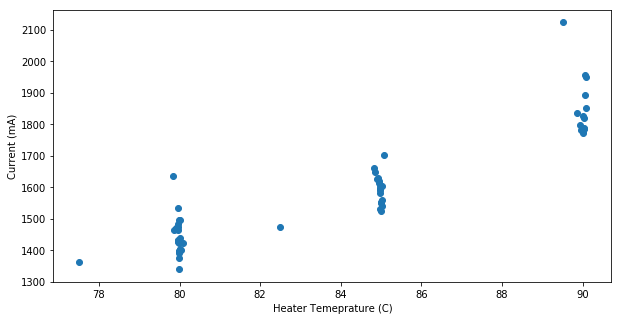

In [15]:
# plot heater current versus temperature
fig, ax1 = plt.subplots()
fig.set_size_inches(10,5)
ax1.scatter(data['Heater Temp Ave (C)'],data['Heater Current Ave (mA)'])
ax1.set_xlabel('Heater Temeprature (C)')
ax1.set_ylabel('Current (mA)')
print('Heater Current versus Temperature')

Heater Current versus Feed Rate at 80C


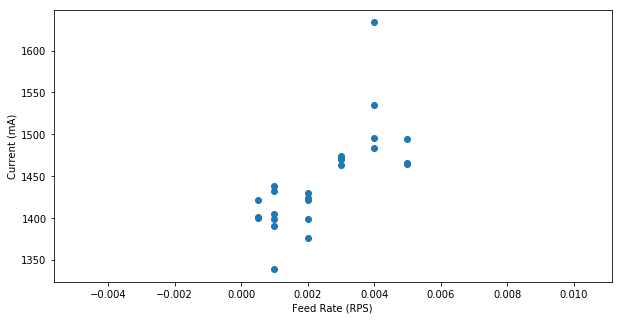

In [16]:
# plot heater current versus feed rate at a given temperature
# pull out data that is nominally 80C
df = data[data['Heater Temp Ave (C)'] < 80.5]
df = df[df['Heater Temp Ave (C)'] > 79.5]

fig, ax1 = plt.subplots()
fig.set_size_inches(10,5)
ax1.scatter(df['Feed Rate Ave (RPS)'],df['Heater Current Ave (mA)'])
ax1.set_xlabel('Feed Rate (RPS)')
ax1.set_ylabel('Current (mA)')
print('Heater Current versus Feed Rate at 80C')

Spool Motor Current versus Spool Speed


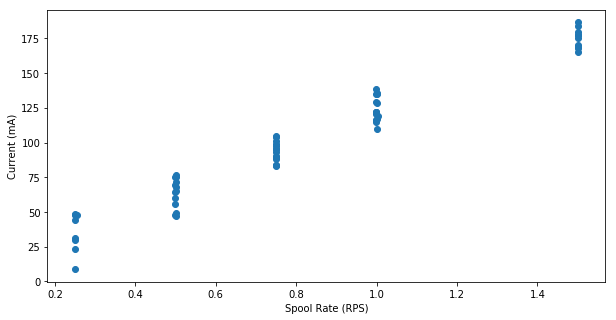

In [17]:
# plot spool current versus speed
fig, ax1 = plt.subplots()
fig.set_size_inches(10,5)
ax1.scatter(data['Spool Rate Ave (RPS)'],data['Spool DC Motor Current Ave (mA)'])
ax1.set_xlabel('Spool Rate (RPS)')
ax1.set_ylabel('Current (mA)')
print('Spool Motor Current versus Spool Speed')

<IPython.core.display.Javascript object>


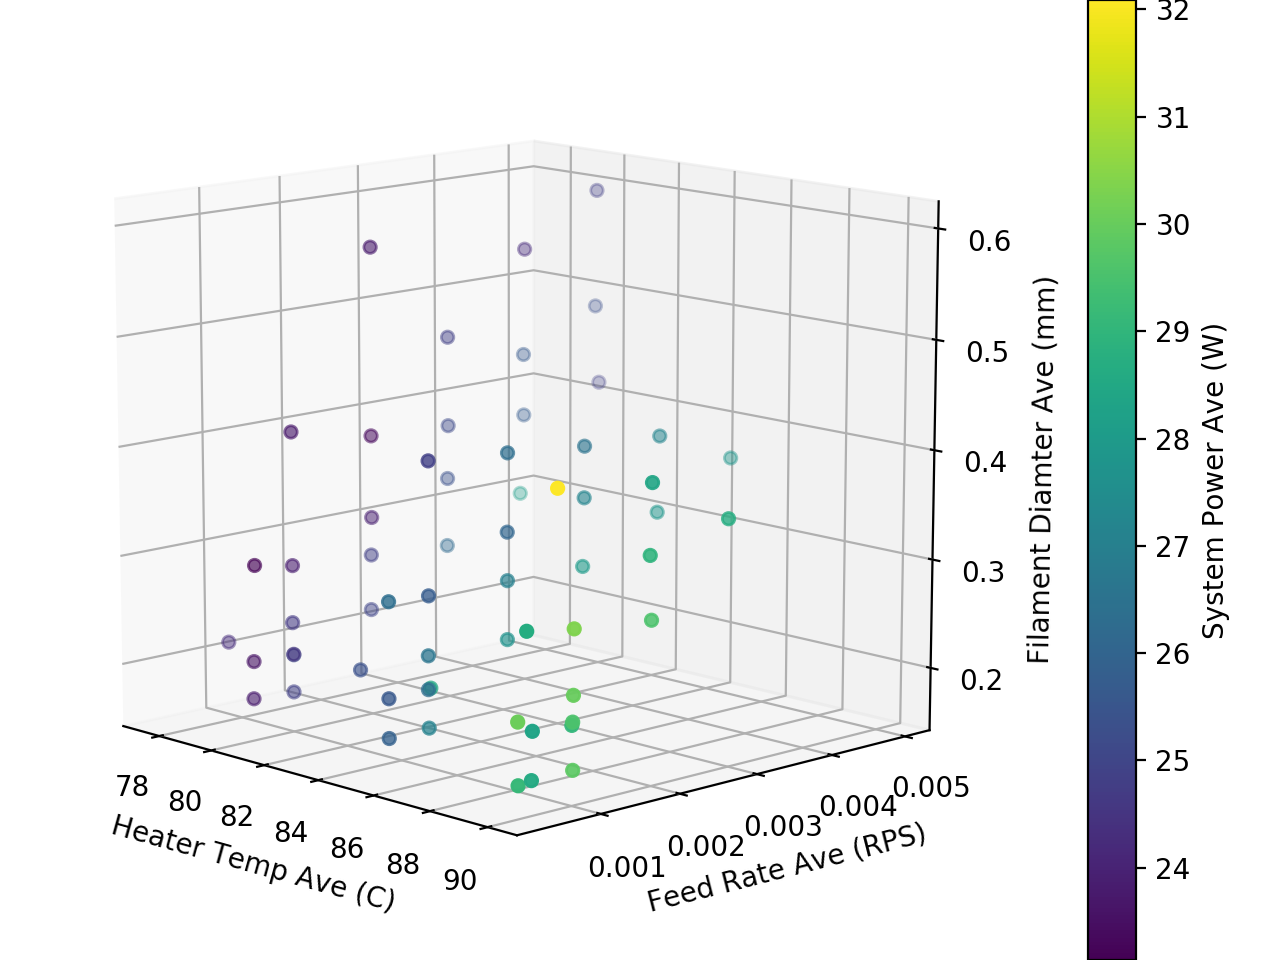

Fiber Diameter versus Feed Speed and Heater Temp (colored with Power)


In [18]:
# 3D plot - feed, diameter, temperature, power
%matplotlib notebook
fig = plt.figure()
ax1 = Axes3D(fig)
pl = ax1.scatter(data['Heater Temp Ave (C)'],data['Feed Rate Ave (RPS)'],data['Filament Diamter Ave (mm)'],c=data['System Power Ave (W)'])
ax1.set_xlabel('Heater Temp Ave (C)')
ax1.set_ylabel('Feed Rate Ave (RPS)')
ax1.set_zlabel('Filament Diamter Ave (mm)')
plt.colorbar(pl, label='System Power Ave (W)')
print('Fiber Diameter versus Feed Speed and Heater Temp (colored with Power)')

In [19]:
# add a dataframe column that includes power per feed rate
data['Power per Feed Rate (W/RPS)'] = data['System Power Ave (W)'] / data['Feed Rate Ave (RPS)']
data

,Run File,Feed Rate Ave (RPS),Spool Wind Rate Set (RPS),Spool Rate Ave (RPS),Wind BF Rate Ave (PPS),Heater Set (C),Heater Temp Ave (C),Filament Diamter Ave (mm),Filament Std Dev (mm),System Power Ave (W),System Power Std Dev (W),Heater Current Ave (mA),Heater Current Std Dev (mA),Spool DC Motor Current Ave (mA),Spool DC Motor Current Std Dev (mA),Stepper and 12V Current Ave (mA),Stepper and 12V Current Std Dev (mA),Sqrt Feed/Spool,Power per Feed Rate (W/RPS)
0,log_Manual Control__2020-04-12_12-13-50.csv,0.001000,1.00,1.000132,127.730719,90.0,90.009313,0.213487,0.016746,29.041052,1.000198,1778.186258,79.322377,134.912897,4.725082,506.607985,21.983723,0.031621,29041.052256
1,log_Manual Control__2020-04-12_17-26-48.csv,0.000312,0.25,0.250982,20.426288,90.0,90.068162,0.228383,0.044286,30.064674,1.123981,1956.170717,89.196351,48.890935,2.843820,503.176947,23.016114,0.035286,96206.956262
2,log_Manual Control__2020-04-12_17-26-48.csv,0.000312,0.50,0.499899,28.561457,90.0,90.080434,0.172805,0.012332,29.126951,1.001411,1849.457701,83.001875,76.481605,2.496682,503.087202,21.010638,0.025003,93206.244234
3,log_Manual Control__2020-04-12_17-49-04.csv,0.000500,0.25,0.254232,45.159629,90.0,89.850642,0.302968,0.022932,28.685025,1.093912,1836.095309,89.052970,48.176519,4.276480,506.039012,19.272695,0.044348,57370.050963
4,log_Manual Control__2020-04-12_17-49-04.csv,0.000500,0.50,0.499777,63.865360,90.0,90.043857,0.217002,0.014405,28.366543,0.931641,1785.295597,76.500593,75.523040,2.469729,507.120755,19.777991,0.031630,56733.085786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,log_Manual Control__2020-05-26_10-47-57.csv,0.004000,0.75,0.749697,221.236095,80.0,79.951250,0.450721,0.029310,25.648463,2.279616,1483.039423,530.116817,83.442500,76.902199,529.627885,72.508352,0.073044,6412.115625
57,log_Manual Control__2020-05-26_10-47-57.csv,0.004000,0.50,0.499585,180.638516,80.0,79.994511,0.549398,0.042787,24.219703,9.242227,1496.053383,252.112897,47.506090,126.437749,493.186466,590.291411,0.089480,6054.925714
58,log_Manual Control__2020-05-26_10-47-57.csv,0.005000,1.00,0.998329,285.614571,80.0,80.010143,0.412343,0.052719,24.840470,9.815740,1494.695714,143.295658,122.041786,44.229984,447.714286,810.909139,0.070770,4968.093943
59,log_Manual Control__2020-05-26_10-47-57.csv,0.005000,0.75,0.749777,247.349474,80.0,79.871364,0.484278,0.036691,25.306375,1.619509,1464.442045,549.825712,83.640000,67.426717,524.756818,63.443992,0.081662,5061.274909


<IPython.core.display.Javascript object>


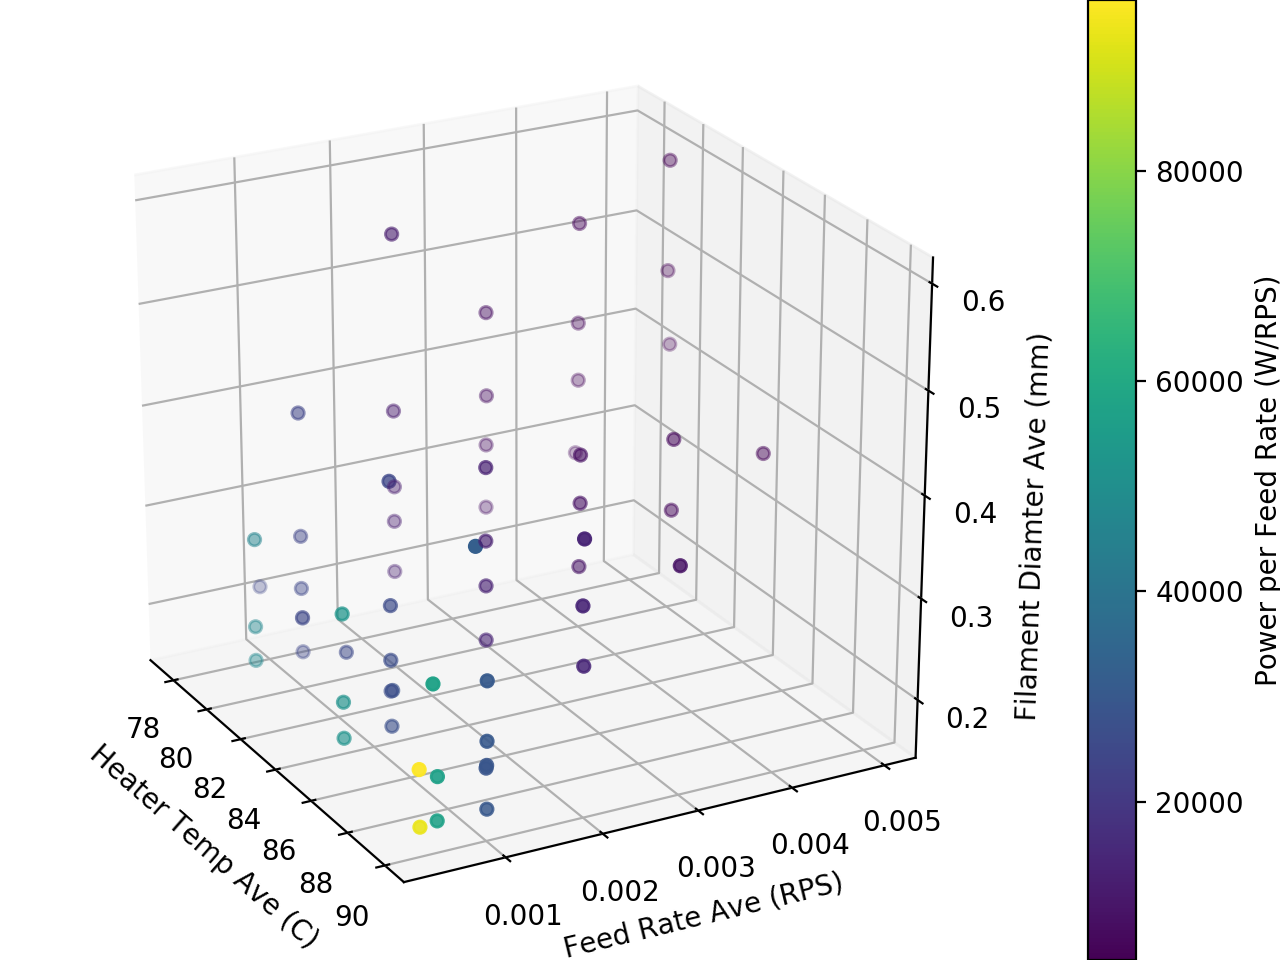

Fiber Diameter versus Feed Speed and Heater Temp (colored with Power metric)


In [20]:
# 3D plot - feed, diameter, temperature, power metric
%matplotlib notebook
fig = plt.figure()
ax1 = Axes3D(fig)
pl = ax1.scatter(data['Heater Temp Ave (C)'],data['Feed Rate Ave (RPS)'],data['Filament Diamter Ave (mm)'],c=data['Power per Feed Rate (W/RPS)'])
ax1.set_xlabel('Heater Temp Ave (C)')
ax1.set_ylabel('Feed Rate Ave (RPS)')
ax1.set_zlabel('Filament Diamter Ave (mm)')
plt.colorbar(pl, label='Power per Feed Rate (W/RPS)')
print('Fiber Diameter versus Feed Speed and Heater Temp (colored with Power metric)')

<IPython.core.display.Javascript object>


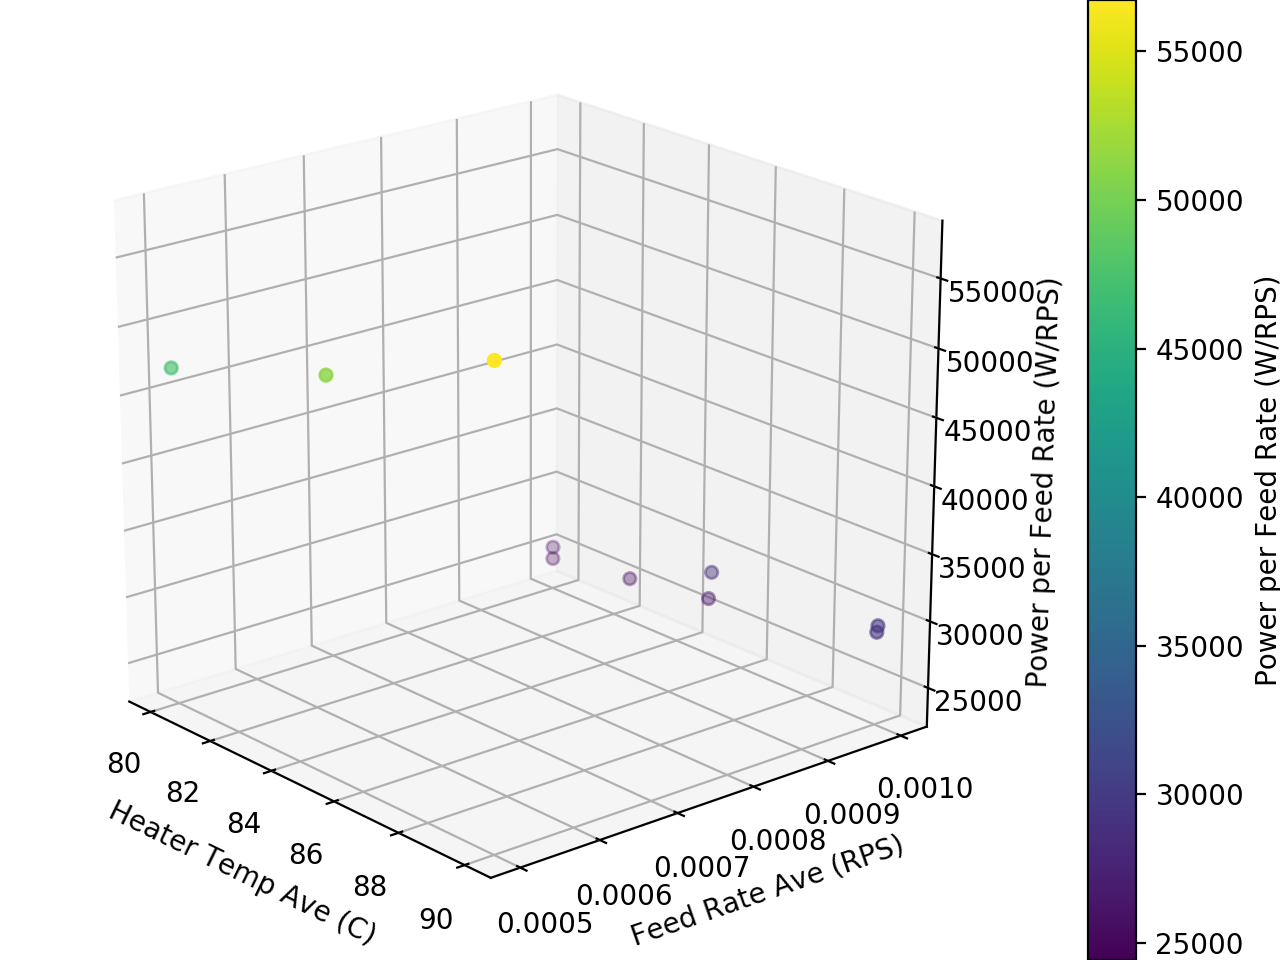

Power per Feed Rate (W/RPS) versus Feed Speed and Heater Temp (.215mm nominal)


In [21]:
# look a example fiber diameter - nom. .214mm
df = data[data['Filament Diamter Ave (mm)'] < .22]
df = df[df['Filament Diamter Ave (mm)'] > .21]
#df
# 3D plot - feed, spool, diameter
fig = plt.figure()
ax1 = Axes3D(fig)
pl = ax1.scatter(df['Heater Temp Ave (C)'],df['Feed Rate Ave (RPS)'],df['Power per Feed Rate (W/RPS)'],c=df['Power per Feed Rate (W/RPS)'])
ax1.set_xlabel('Heater Temp Ave (C)')
ax1.set_ylabel('Feed Rate Ave (RPS)')
ax1.set_zlabel('Power per Feed Rate (W/RPS)')
plt.colorbar(pl, label='Power per Feed Rate (W/RPS)')
print('Power per Feed Rate (W/RPS) versus Feed Speed and Heater Temp (.215mm nominal)')

<IPython.core.display.Javascript object>


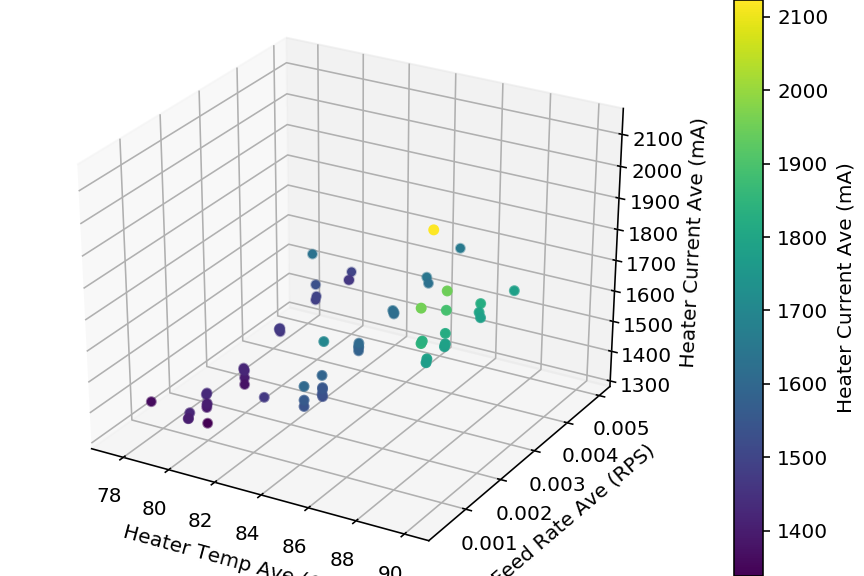

Heater Current Ave (mA) versus Feed Speed and Heater Temp


In [51]:
# Look at Power (current) Components - Heater
fig = plt.figure()
ax1 = Axes3D(fig)
pl = ax1.scatter(data['Heater Temp Ave (C)'],data['Feed Rate Ave (RPS)'],data['Heater Current Ave (mA)'],c=data['Heater Current Ave (mA)'])
ax1.set_xlabel('Heater Temp Ave (C)')
ax1.set_ylabel('Feed Rate Ave (RPS)')
ax1.set_zlabel('Heater Current Ave (mA)')
plt.colorbar(pl, label='Heater Current Ave (mA)')
print('Heater Current Ave (mA) versus Feed Speed and Heater Temp')

<IPython.core.display.Javascript object>


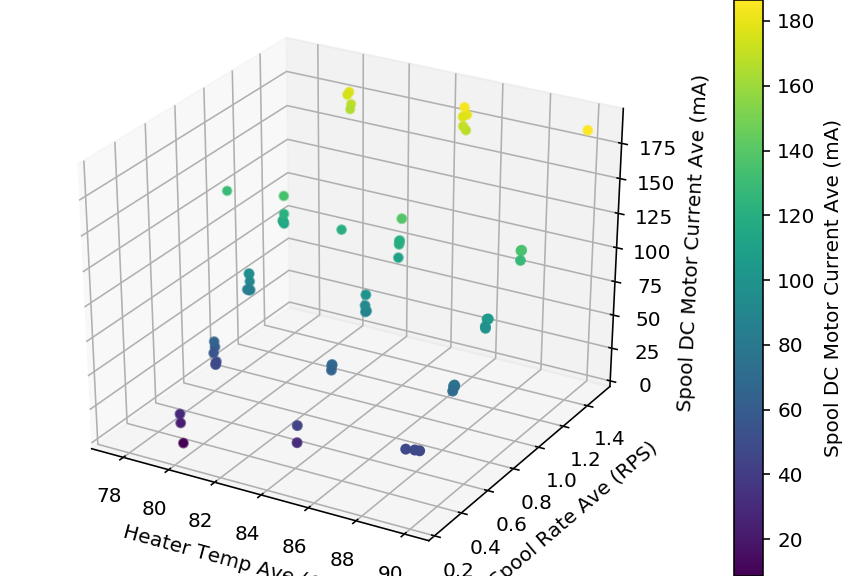

Spool DC Motor Current Ave (mA) versus Feed Speed and Heater Temp


In [52]:
# Look at Power (current) Components - Spool
fig = plt.figure()
ax1 = Axes3D(fig)
pl = ax1.scatter(data['Heater Temp Ave (C)'],data['Spool Rate Ave (RPS)'],data['Spool DC Motor Current Ave (mA)'],c=data['Spool DC Motor Current Ave (mA)'])
ax1.set_xlabel('Heater Temp Ave (C)')
ax1.set_ylabel('Spool Rate Ave (RPS)')
ax1.set_zlabel('Spool DC Motor Current Ave (mA)')
plt.colorbar(pl, label='Spool DC Motor Current Ave (mA)')
print('Spool DC Motor Current Ave (mA) versus Feed Speed and Heater Temp')

<IPython.core.display.Javascript object>


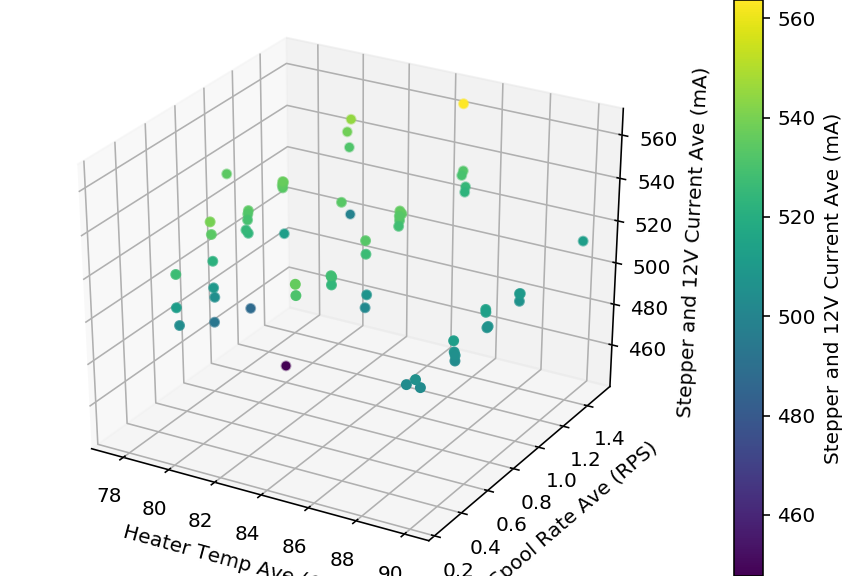

Stepper and 12V Current Ave (mA) versus Feed Speed and Heater Temp


In [53]:
# Look at Power (current) Components - Feed & Ancillary
fig = plt.figure()
ax1 = Axes3D(fig)
pl = ax1.scatter(data['Heater Temp Ave (C)'],data['Spool Rate Ave (RPS)'],data['Stepper and 12V Current Ave (mA)'],c=data['Stepper and 12V Current Ave (mA)'])
ax1.set_xlabel('Heater Temp Ave (C)')
ax1.set_ylabel('Spool Rate Ave (RPS)')
ax1.set_zlabel('Stepper and 12V Current Ave (mA)')
plt.colorbar(pl, label='Stepper and 12V Current Ave (mA)')
print('Stepper and 12V Current Ave (mA) versus Feed Speed and Heater Temp')